In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np


In [2]:
train_data = pd.read_csv('./input/train.csv')
test_data = pd.read_csv('./input/test.csv')

In [3]:
train_data.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,1,A,B,A,B,A,A,A,A,B,...,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,2,A,B,A,A,A,A,A,A,B,...,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
2,5,A,B,A,A,B,A,A,A,B,...,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
3,10,B,B,A,B,A,A,A,A,B,...,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
4,11,A,B,A,B,A,A,A,A,B,...,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85


In [4]:
print("Number of missing values", train_data.isnull().sum().sum())

Number of missing values 0


In [5]:
train_data.describe()

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
count,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000
mean,294135.982561,0.493861,0.507188,0.498918,0.491812,0.487428,0.490945,0.484970,0.486437,0.485506,0.498066,0.493511,0.493150,0.493138,0.495717,3037.337686
std,169336.084867,0.187640,0.207202,0.202105,0.211292,0.209027,0.205273,0.178450,0.199370,0.181660,0.185877,0.209737,0.209427,0.212777,0.222488,2904.086186
min,1.000000,0.000016,0.001149,0.002634,0.176921,0.281143,0.012683,0.069503,0.236880,0.000080,0.000000,0.035321,0.036232,0.000228,0.179722,0.670000
25%,147748.250000,0.346090,0.358319,0.336963,0.327354,0.281143,0.336105,0.350175,0.312800,0.358970,0.364580,0.310961,0.311661,0.315758,0.294610,1204.460000
50%,294539.500000,0.475784,0.555782,0.527991,0.452887,0.422268,0.440945,0.438285,0.441060,0.441450,0.461190,0.457203,0.462286,0.363547,0.407403,2115.570000
75%,440680.500000,0.623912,0.681761,0.634224,0.652072,0.643315,0.655021,0.591045,0.623580,0.566820,0.614590,0.678924,0.675759,0.689974,0.724623,3864.045000
max,587633.000000,0.984975,0.862654,0.944251,0.954297,0.983674,0.997162,1.000000,0.980200,0.995400,0.994980,0.998742,0.998484,0.988494,0.844848,121012.250000


In [6]:
contFeatureslist=[]
for colName, x in train_data.iloc[1,:].iteritems():
    if(not str(x).isalpha()):
        contFeatureslist.append(colName)
        

In [7]:
print(contFeatureslist)

['id', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6', 'cont7', 'cont8', 'cont9', 'cont10', 'cont11', 'cont12', 'cont13', 'cont14', 'loss']


In [8]:
contFeatureslist.remove('id')
contFeatureslist.remove('loss')

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

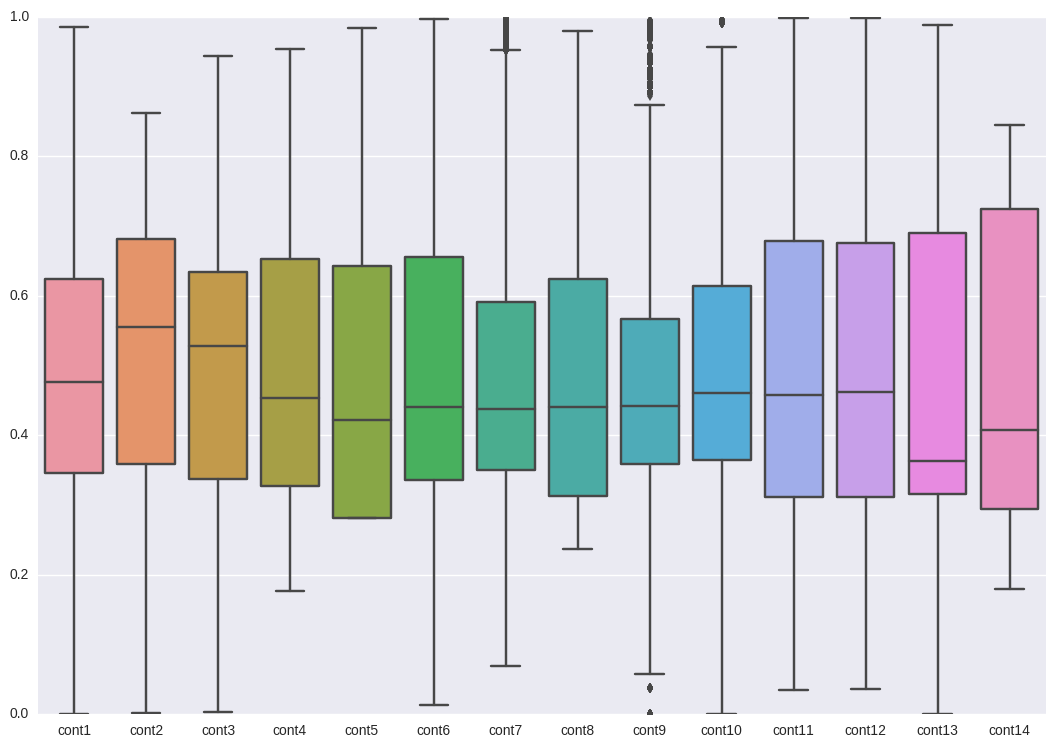

In [11]:
plt.figure(figsize=(13,9))
sns.boxplot(train_data[contFeatureslist])

In [12]:
contFeatureslist.append('loss')

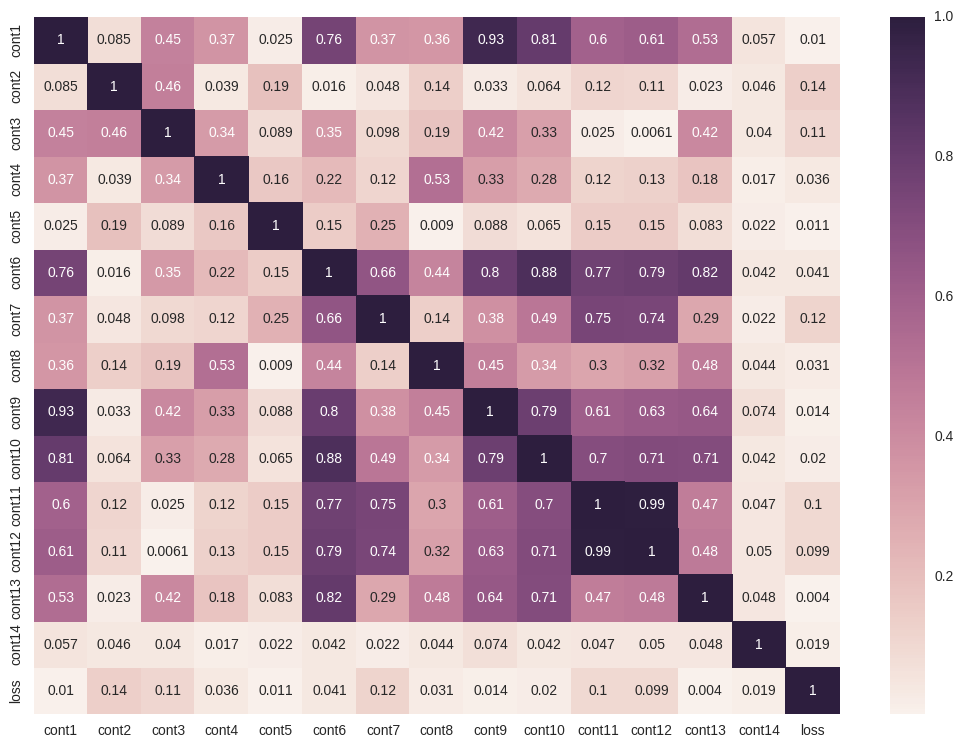

In [14]:
corrlationMatrix = train_data[contFeatureslist].corr().abs()

plt.subplots(figsize=(13, 9)
sns.heatmap(corrlationMatrix, annot=True)

#Mask unimportant feaures
sns.heatmap(corrlationMatrix, mask=corrlationMatrix < 1, cbar=False)
plt.show()

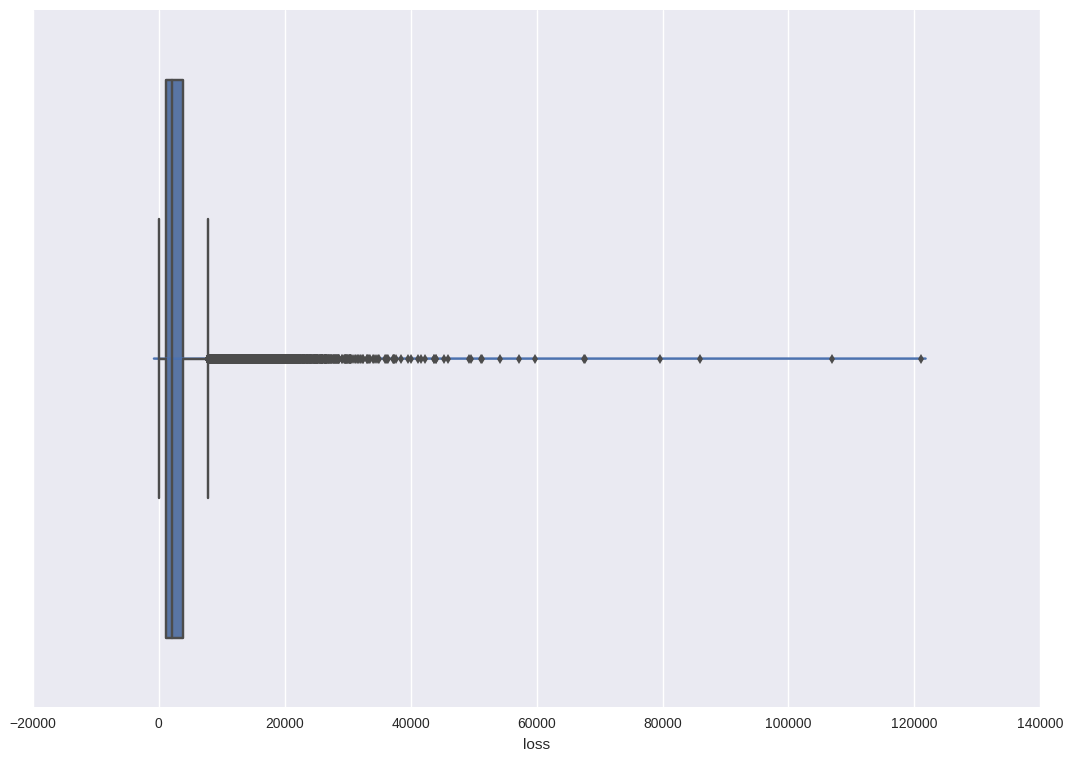

In [15]:
plt.figure(figsize=(13,9))
sns.distplot(train_data['loss'])
sns.boxplot(train_data['loss'])

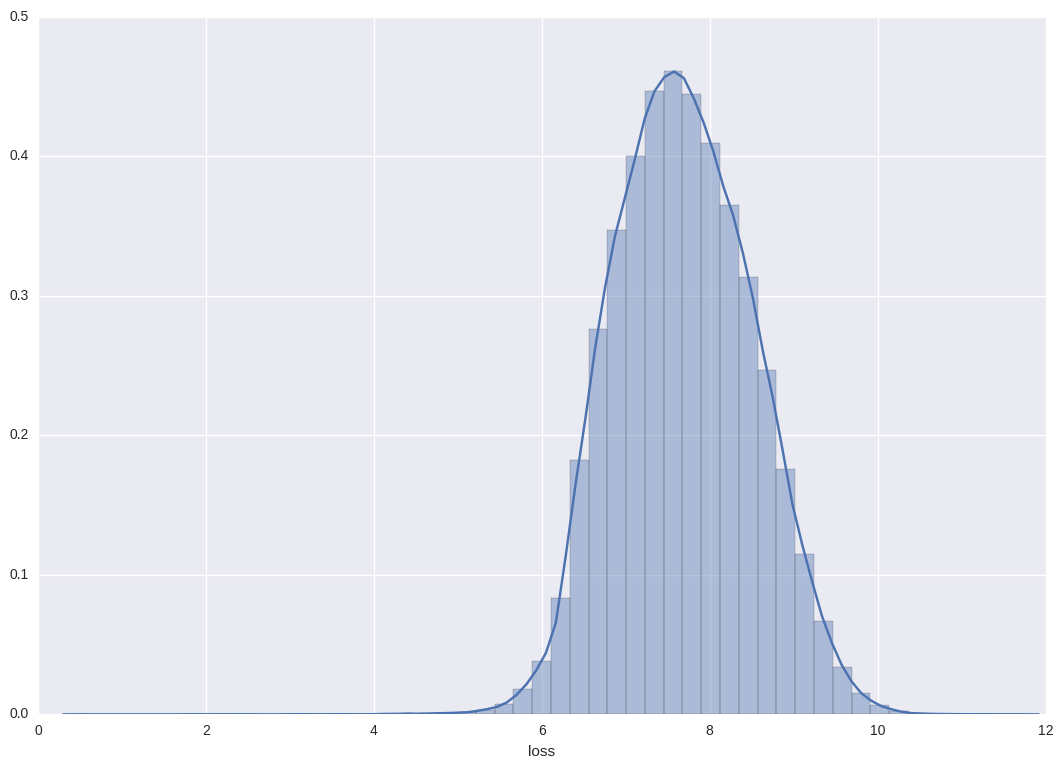

In [16]:
plt.figure(figsize=(13,9))
sns.distplot(np.log1p(train_data['loss']))

In [17]:
catCount = sum(str(x).isalpha() for x in train_data.iloc[1,:])
print('Number of categories:', catCount)

Number of categories: 116


In [18]:
catFeaturesList = []
for colName, x in train_data.iloc[1,:].iteritems():
    if(str(x).isalpha()):
        catFeaturesList.append(colName)

In [19]:
print(train_data[catFeaturesList].apply(pd.Series.nunique))

cat1        2
cat2        2
cat3        2
cat4        2
cat5        2
cat6        2
cat7        2
cat8        2
cat9        2
cat10       2
cat11       2
cat12       2
cat13       2
cat14       2
cat15       2
cat16       2
cat17       2
cat18       2
cat19       2
cat20       2
cat21       2
cat22       2
cat23       2
cat24       2
cat25       2
cat26       2
cat27       2
cat28       2
cat29       2
cat30       2
         ... 
cat87       4
cat88       4
cat89       8
cat90       7
cat91       8
cat92       7
cat93       5
cat94       7
cat95       5
cat96       8
cat97       7
cat98       5
cat99      16
cat100     15
cat101     19
cat102      9
cat103     13
cat104     17
cat105     20
cat106     17
cat107     20
cat108     11
cat109     84
cat110    131
cat111     16
cat112     51
cat113     61
cat114     19
cat115     23
cat116    326
dtype: int64


In [20]:
from sklearn.preprocessing import LabelEncoder

In [22]:
for cf1 in catFeaturesList:
    le = LabelEncoder()
    le.fit(train_data[cf1].unique())
    train_data[cf1] = le.transform(train_data[cf1])

In [23]:
train_data.head(5)

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,1,0,1,0,1,0,0,0,0,1,...,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,2,0,1,0,0,0,0,0,0,1,...,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
2,5,0,1,0,0,1,0,0,0,1,...,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
3,10,1,1,0,1,0,0,0,0,1,...,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
4,11,0,1,0,1,0,0,0,0,1,...,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85


In [24]:
sum(train_data[catFeaturesList].apply(pd.Series.nunique) > 2)

44

In [25]:
filterG5_10 = list((train_data[catFeaturesList].apply(pd.Series.nunique) > 5) & (train_data[catFeaturesList].apply(pd.Series.nunique) < 10))

In [26]:
catFeaturesG5_10List = [i for (i, v) in zip(catFeaturesList, filterG5_10) if v]

In [27]:
len(catFeaturesG5_10List)

8

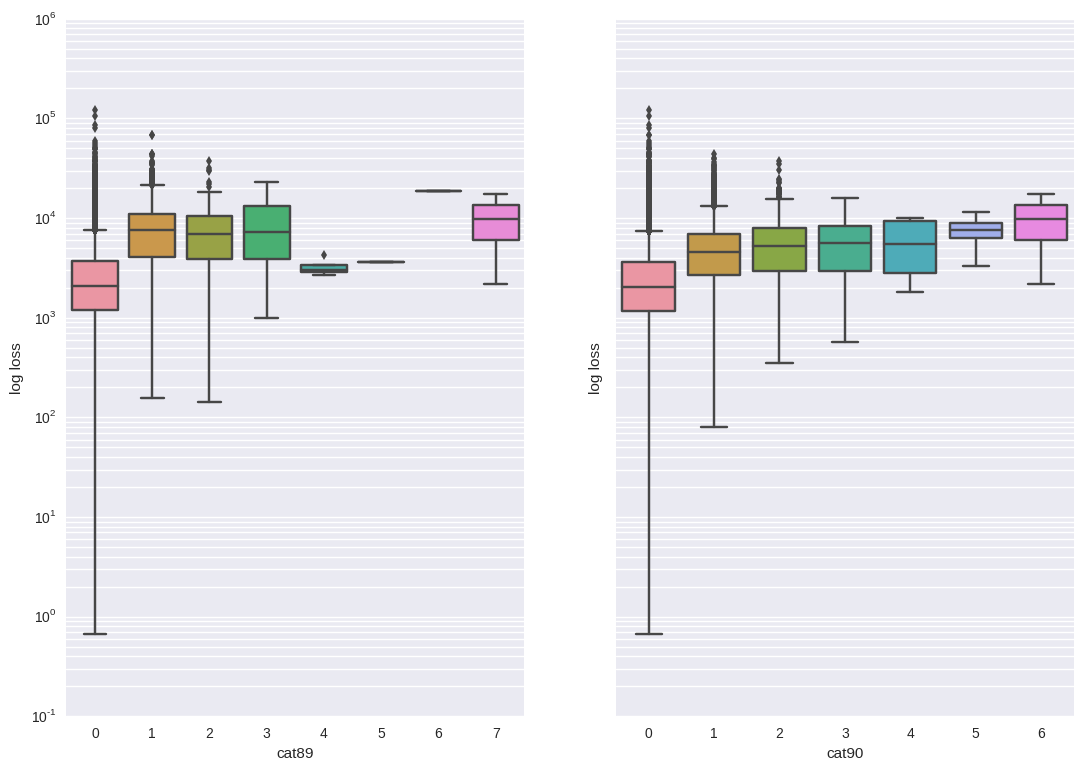

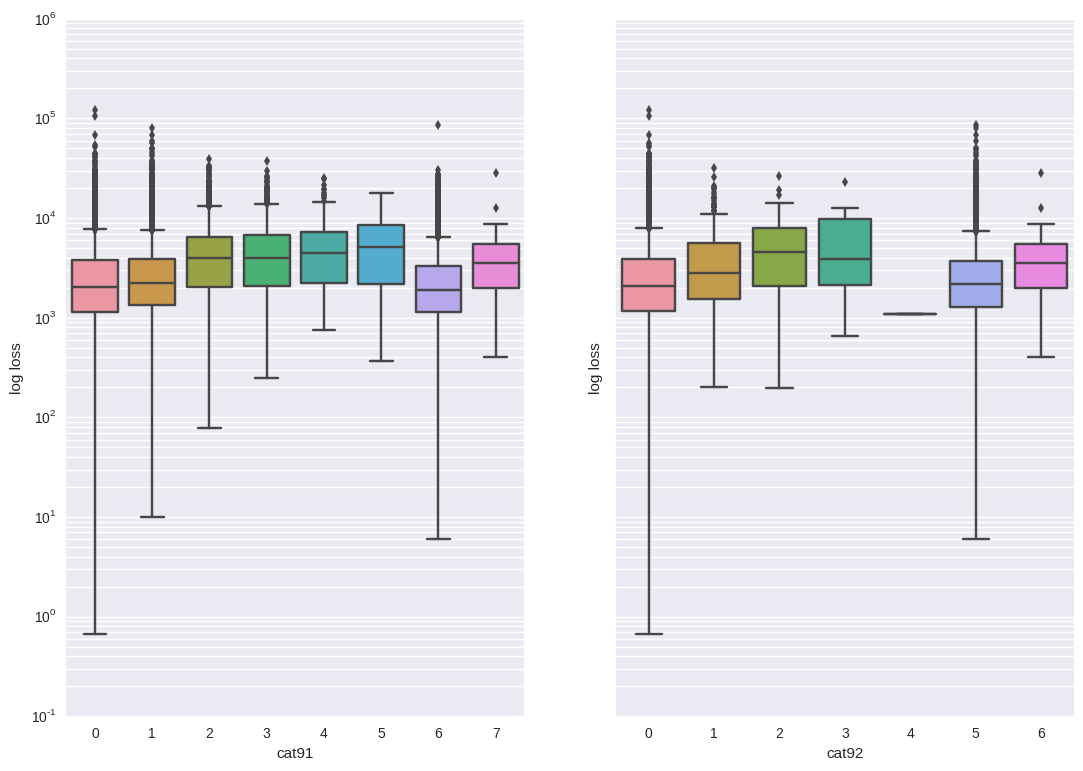

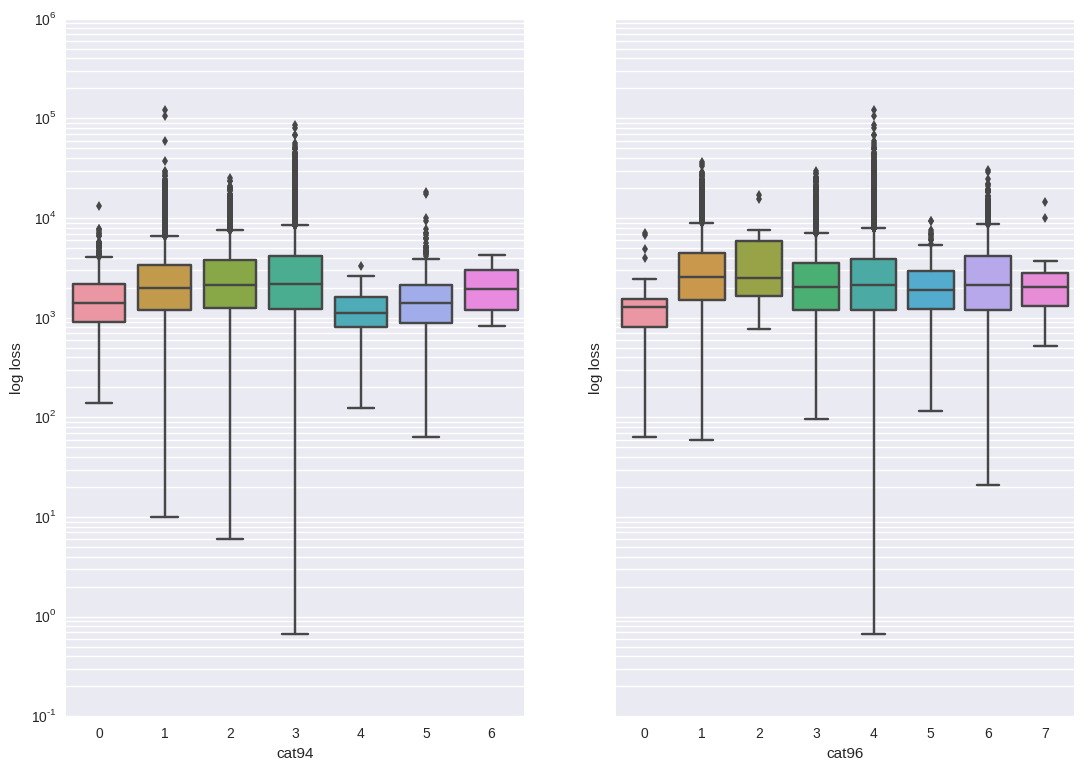

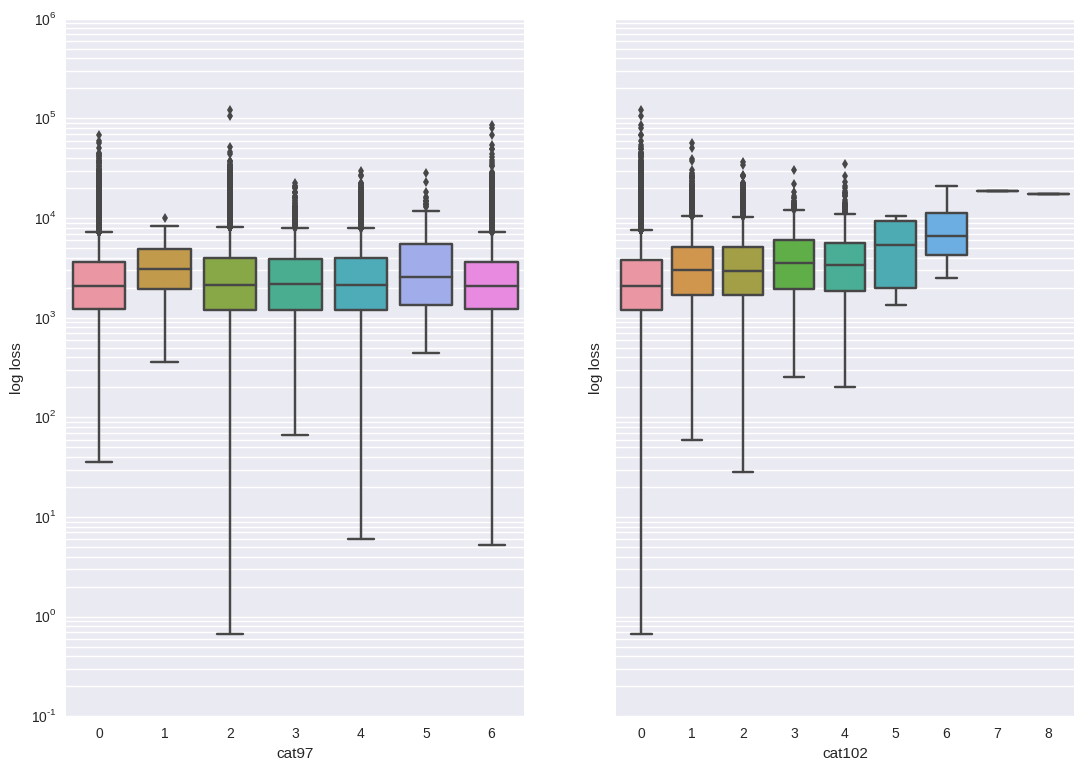

In [29]:
ncol = 2
nrow = 4
try:
    for rowIndex in range(nrow):
        f, axList = plt.subplots(nrows=1, ncols=ncol, sharey=True, figsize=(13, 9))
        features = catFeaturesG5_10List[rowIndex*ncol: ncol*(rowIndex+1)]
        
        for axIndex in range(len(axList)):
            sns.boxplot(x=features[axIndex], y='loss', data=train_data, ax=axList[axIndex])
            axList[axIndex].set(yscale='log')
            axList[axIndex].set(xlabel=features[axIndex], ylabel='log loss')
except IndexError:
    print("")

In [30]:
filterG2 = list((train_data[catFeaturesList].apply(pd.Series.nunique) == 2))
catFeaturesG2List = [i for (i, v) in zip(catFeaturesList, filterG2) if v]
catFeaturesG2List.append('loss')

In [32]:
corrCatMatrix = train_data[catFeaturesG2List].corr().abs()

s = corrCatMatrix.unstack()
sortedSeries = s.order(kind='quicksort', ascending=False)

print("Top 5 most correlated categorical feature pairs: \n")
print(sortedSeries[sortedSeries != 1.0][0:9])

Top 5 most correlated categorical feature pairs: 

cat2   cat9     0.932420
cat9   cat2     0.932420
cat50  cat6     0.925731
cat6   cat50    0.925731
cat8   cat66    0.862231
cat66  cat8     0.862231
cat57  cat7     0.809418
cat7   cat57    0.809418
cat3   cat16    0.783480
dtype: float64
